# Motion Data Amplitude Analysis

指定キロ周辺の全振幅を時系列でプロット（波形表示付き）

## メイン機能
`plot_max_amplitude_timeseries_with_waveforms()` - 全振幅時系列分析と波形表示

In [1]:
# ライブラリのインポート
from amplitude_analysis import plot_max_amplitude_timeseries_with_waveforms

print("全振幅分析ツールを読み込みました。")

全振幅分析ツールを読み込みました。


In [2]:
# 上りデータを抽出
import glob
import yaml

dirnames = glob.glob("datasets/*/")
dirnames.sort()

for dirname in dirnames:
    # configファイルの読み込み
    config_path = dirname + "motion/config/config.yaml"
    with open(config_path, "r") as f:
        config = yaml.safe_load(f)
    if config["Senbetsu"] == 0:
        print(dirname+'/motion/df_acc.csv')

datasets/NO1015_20250320124511//motion/df_acc.csv
datasets/NO1025_20250321124659//motion/df_acc.csv
datasets/NO1035_20250322124425//motion/df_acc.csv
datasets/NO1043_20250323124309//motion/df_acc.csv
datasets/NO1061_20250324124405//motion/df_acc.csv
datasets/NO1069_20250325124615//motion/df_acc.csv
datasets/NO1085_20250326124447//motion/df_acc.csv
datasets/NO1086_20250326124801//motion/df_acc.csv
datasets/NO1089_20250326143120//motion/df_acc.csv
datasets/NO1100_20250327124737//motion/df_acc.csv
datasets/NO1113_20250328124740//motion/df_acc.csv
datasets/NO1122_20250329124730//motion/df_acc.csv
datasets/NO1130_20250330124605//motion/df_acc.csv
datasets/NO1138_20250331124534//motion/df_acc.csv
datasets/NO1149_20250401124452//motion/df_acc.csv
datasets/NO1155_20250402124046//motion/df_acc.csv
datasets/NO1165_20250403124521//motion/df_acc.csv
datasets/NO1174_20250404125238//motion/df_acc.csv
datasets/NO1190_20250405124447//motion/df_acc.csv
datasets/NO1196_20250406124458//motion/df_acc.csv


## 基本的な使用例

以下のセルで、任意のキロ地点での全振幅分析を実行できます。

**パラメータ説明：**
- `target_kilo`: 分析対象キロ地点
- `kilo_range`: 全振幅抽出範囲（±）
- `plot_kilo_start/end`: 波形表示範囲

In [3]:
# 基本的な全振幅分析の実行

reference_path = 'datasets/NO1853_20250702124603/motion/'

dataset_info = {
        'data1':'datasets/NO1777_20250621124423//motion/',
        'data2':'datasets/NO1782_20250622124417//motion/',
        'data3':'datasets/NO1787_20250623132247//motion/',
        'data4':'datasets/NO1792_20250624124357//motion/',
        'data5':'datasets/NO1800_20250625124705//motion/',
        'data6':'datasets/NO1822_20250627124242//motion/',
        'data7':'datasets/NO1828_20250628124513//motion/',
        'data8':'datasets/NO1833_20250629124502//motion/',
        'data9':'datasets/NO1839_20250630124708//motion/',
        'data10':'datasets/NO1845_20250701124441//motion/',
        'data11':'datasets/NO1853_20250702124603//motion/',
    }


In [4]:
import pandas as pd
# df_full_amp_UD.csvの読み込み
data = pd.read_csv(reference_path + 'df_full_amp_UD.csv')

# data['full_amp']が3以上のキロ程を抽出
filtered_data = data.loc[data['full_amp'] >= 3, 'Kilo']
filtered_data

2264      4.369153
2326      4.680068
2329      4.690176
2332      4.699667
2333      4.703420
2334      4.708676
2345      4.749576
2346      4.758424
2844      5.968012
3436      7.825234
3924      8.443609
4135      9.471611
4136      9.476120
6438     15.915927
8270     20.876586
8282     20.928358
8389     21.608419
8390     21.614854
8974     23.807198
8976     23.827203
9518     25.570730
9527     25.639252
9528     25.645508
9631     26.240357
9632     26.247917
9633     26.257523
9650     26.379333
9710     26.707373
10872    30.435974
10873    30.441976
10931    30.715142
10932    30.724642
11089    31.664198
11090    31.671405
11091    31.679931
11092    31.685875
11093    31.691076
11094    31.700917
11095    31.708082
11601    32.841870
Name: Kilo, dtype: float64

=== 全振幅時系列分析（波形表示付き） ===
ターゲットキロ: 4.369153465283791
全振幅抽出範囲: ±0.005m
波形位置補正: 無効
\nデータ読み込み・補正処理中...
  data1を処理中...
  data2を処理中...
  data3を処理中...
  data4を処理中...
  data5を処理中...
  data6を処理中...
  data7を処理中...
  data8を処理中...
  data9を処理中...
  data10を処理中...
  data11を処理中...
\n全振幅分析中...
  data0を分析中...
  data0で55個の振幅を検出
  data1で52個の振幅を検出
  data2で53個の振幅を検出
  data3で55個の振幅を検出
  data4で43個の振幅を検出
  data5で45個の振幅を検出
  data6で51個の振幅を検出
  data7で77個の振幅を検出
  data8で49個の振幅を検出
  data9で49個の振幅を検出
  data10で59個の振幅を検出
  data11で55個の振幅を検出
振幅データ 643 件を作成しました。


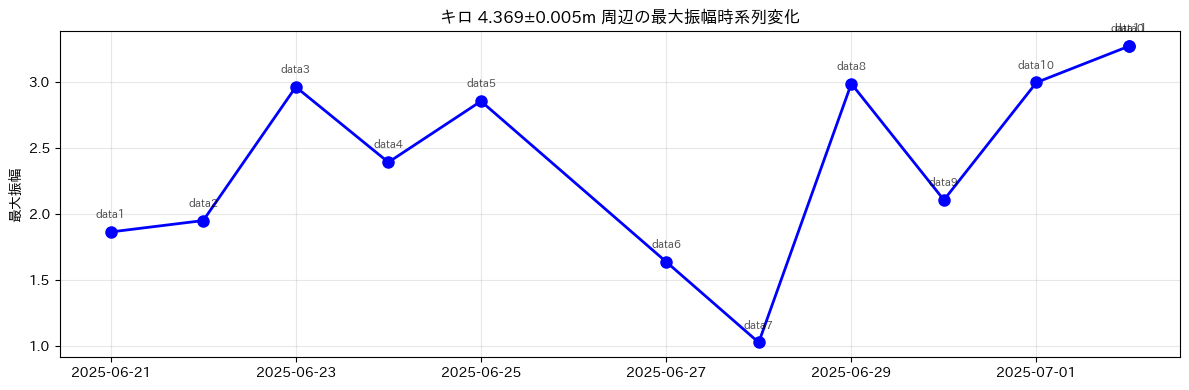

\n=== キロ 4.369±0.005m の最大振幅統計 ===
データセット数: 12
振幅範囲: 1.0264 - 3.2701
平均振幅: 2.4423
標準偏差: 0.7235
\n波形連続プロットを生成中...


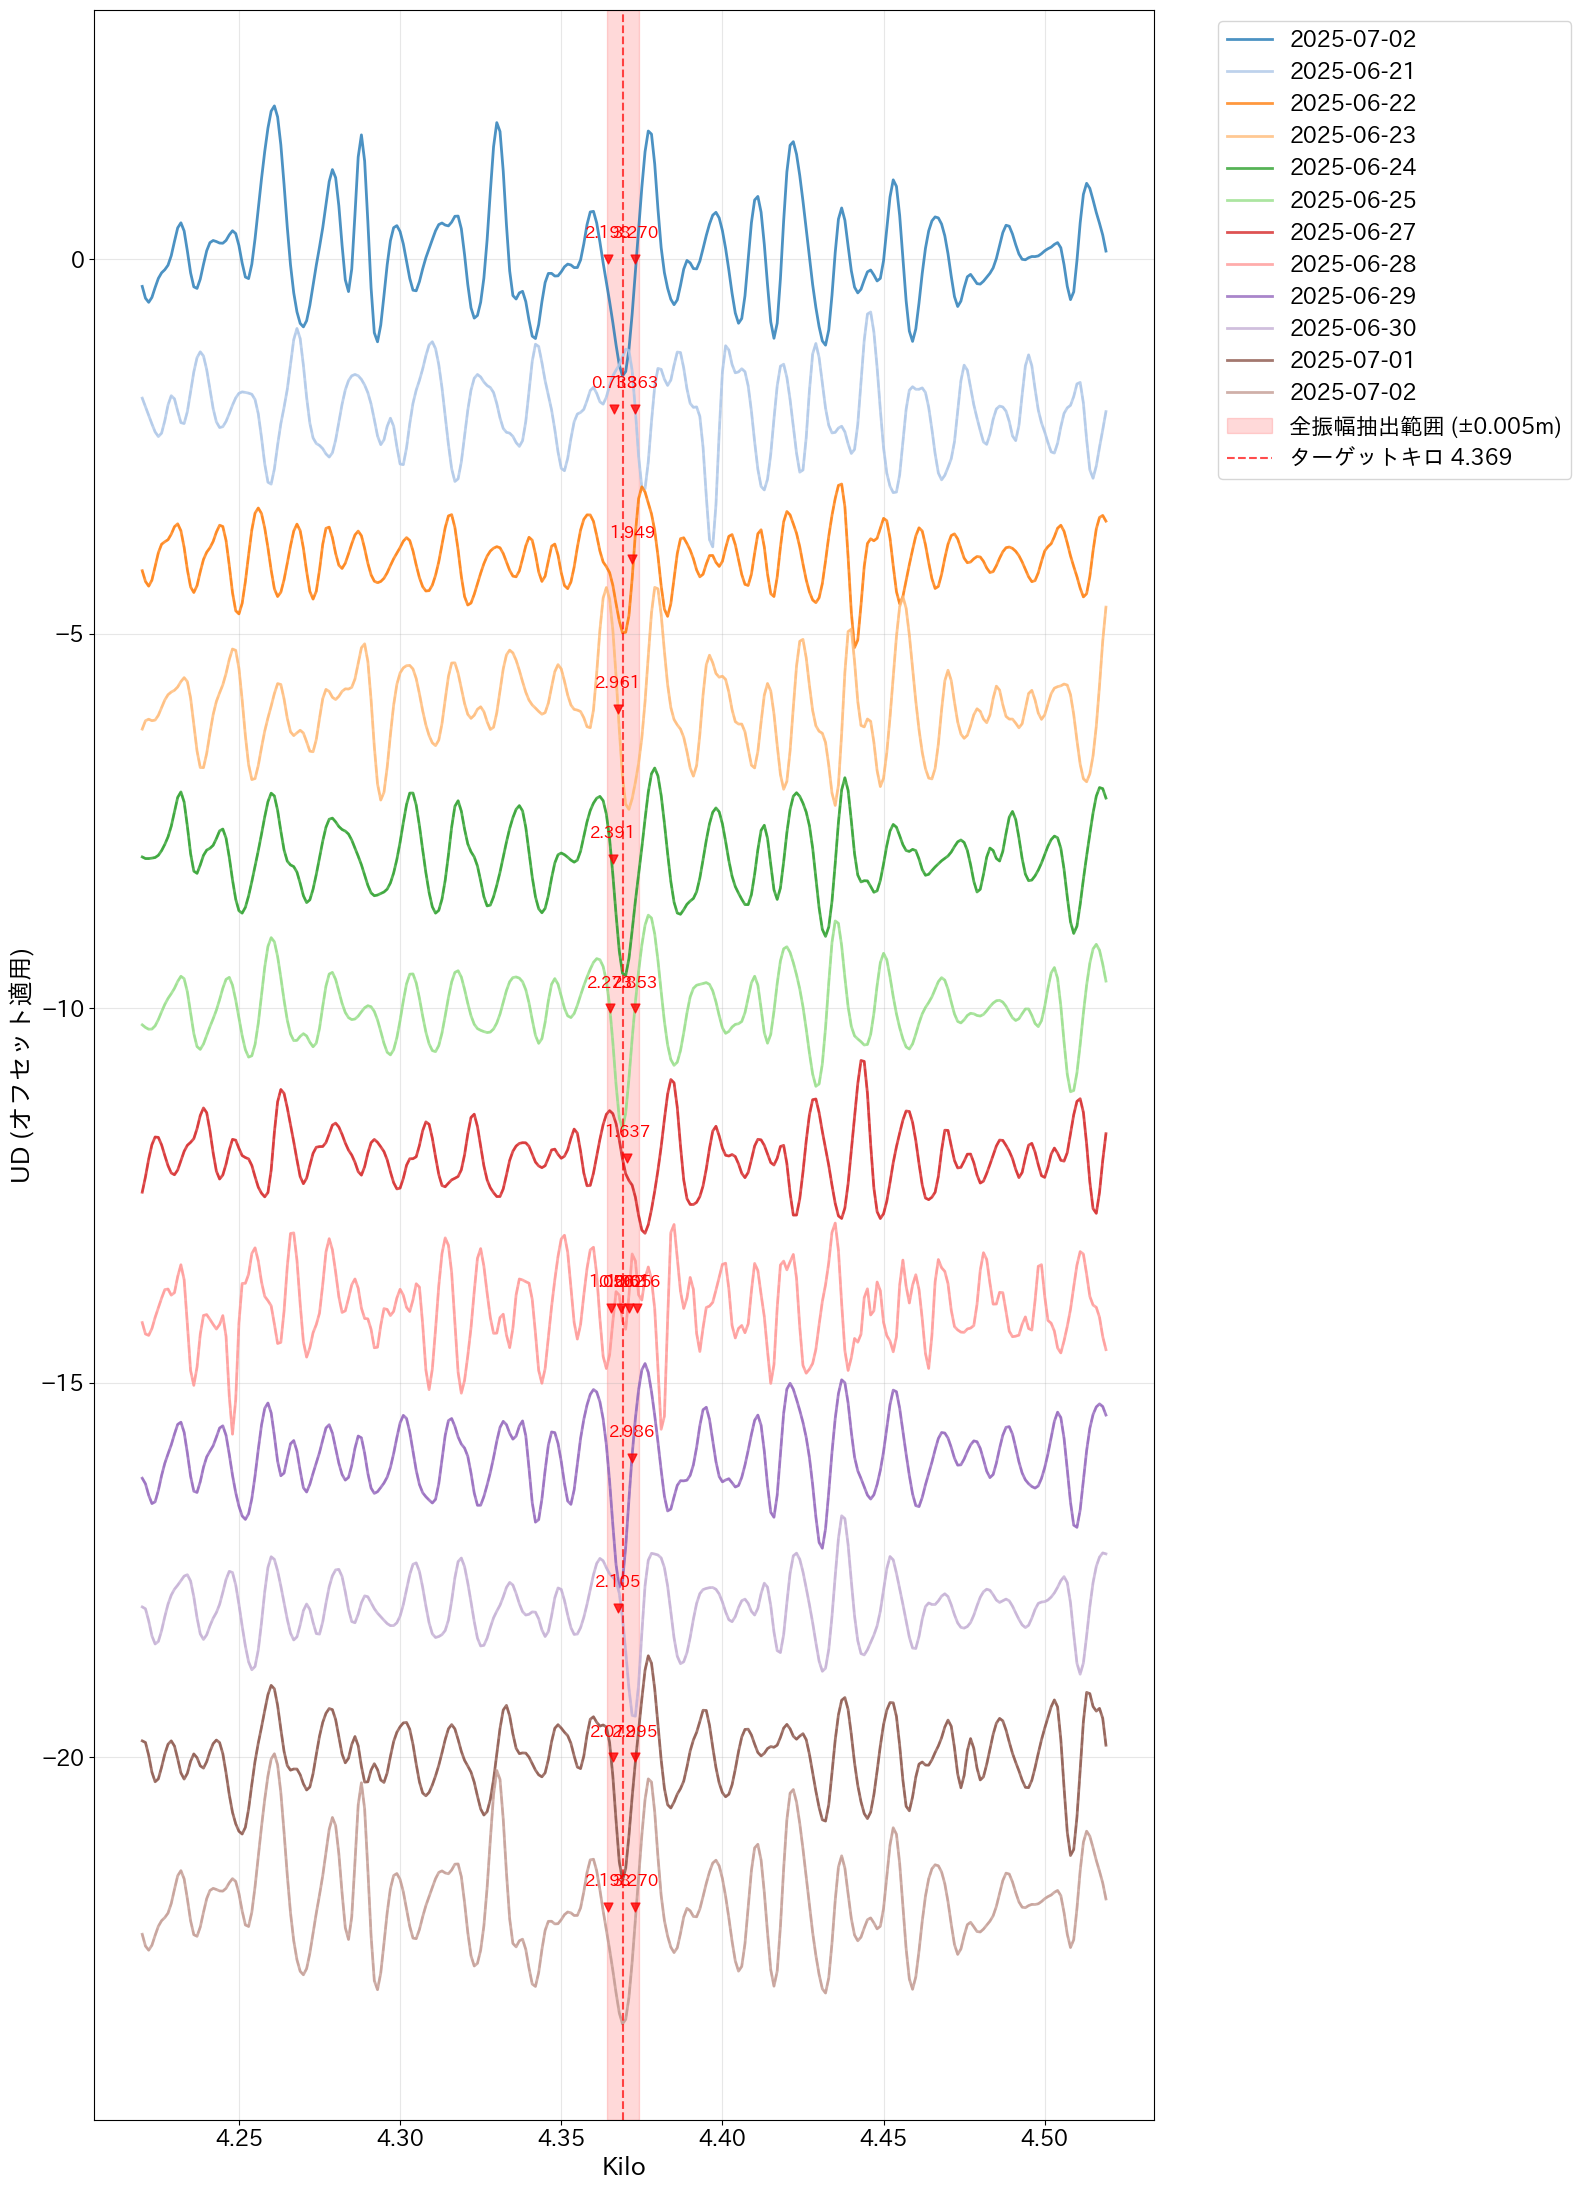

In [5]:
target_kilo=4.369153465283791


result = plot_max_amplitude_timeseries_with_waveforms(
    target_kilo=target_kilo,      # 分析対象キロ
    reference_path=reference_path,  # 参照データのパス
    dataset_info=dataset_info,    # データセット情報
    kilo_range=0.005,        # 全振幅抽出範囲（±0.005km）
    plot_kilo_start=target_kilo-0.15,   # 波形表示開始キロ
    plot_kilo_end=target_kilo+0.15,      # 波形表示終了キロ
    analysis_kilo_start=target_kilo-0.15,  # 分析開始キロ
    analysis_kilo_end=target_kilo+0.15,    # 分析終了キロ
    figsize=(16, 2*len(dataset_info)),      # グラフのサイズ
    enable_correction=False                   # 波形位置補正を有効にする
)

## 完了

以上で全振幅分析が完了です！

**出力内容：**
1. 時系列グラフ（最大振幅の時間変化）
2. 波形連続プロット（data0-data12の波形表示）
3. 統計情報（コンソール出力）

必要に応じて上記のセルを再実行して、異なるキロ地点で分析してください。